In [1]:
import pandas as pd

# Load the dataframe.
df = pd.read_csv("realistic_drug_labels_side_effects.csv")

# Display the first 5 rows to understand the data.
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column information to understand the data types.
print(df.info())

| drug_name    | manufacturer     | approval_year   | drug_class     | indications            | side_effects                        | dosage_mg   | administration_route   | contraindications   | warnings                 | price_usd   | batch_number   | expiry_date   | side_effect_severity   | approval_status   |
|:-------------|:-----------------|:----------------|:---------------|:-----------------------|:------------------------------------|:------------|:-----------------------|:--------------------|:-------------------------|:------------|:---------------|:--------------|:-----------------------|:------------------|
| Seroxetine50 | AstraZeneca      | 1996            | Antidepressant | Allergy relief         | Fatigue, Nausea                     | 260         | Rectal                 | Bleeding disorders  | Avoid alcohol            | 192.43      | MV388Pl        | 2026-11-29    | Mild                   | Pending           |
| Mecoparin93  | AstraZeneca      | 2018            | Vacc

<Figure size 1500x800 with 0 Axes>

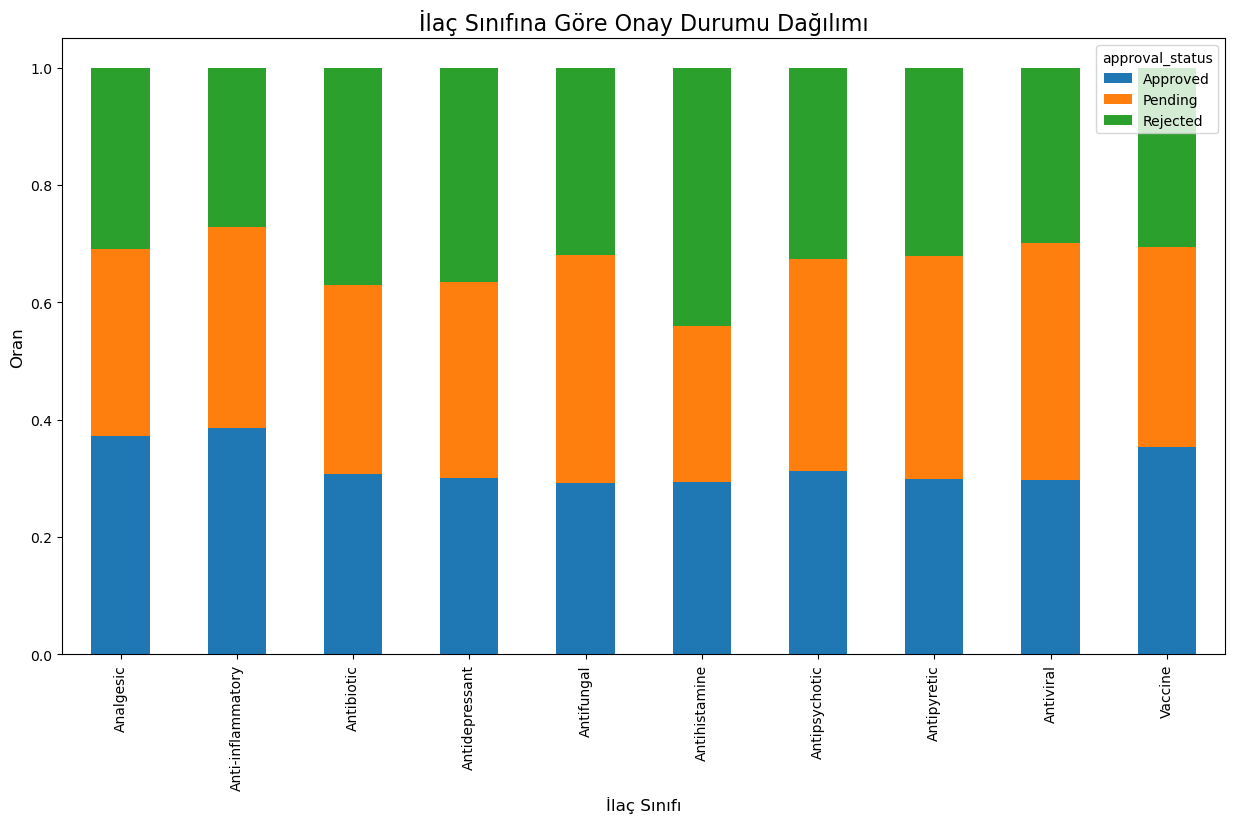

<Figure size 1000x600 with 0 Axes>

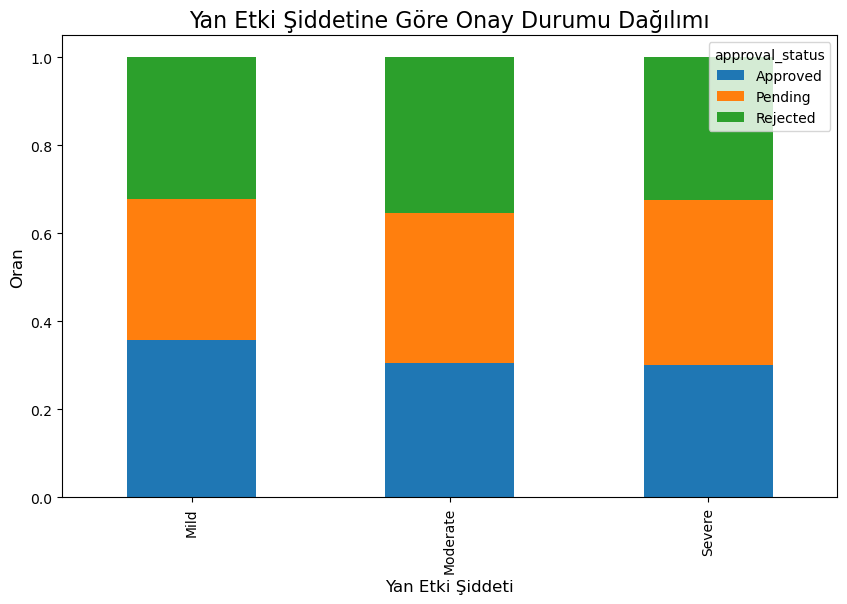

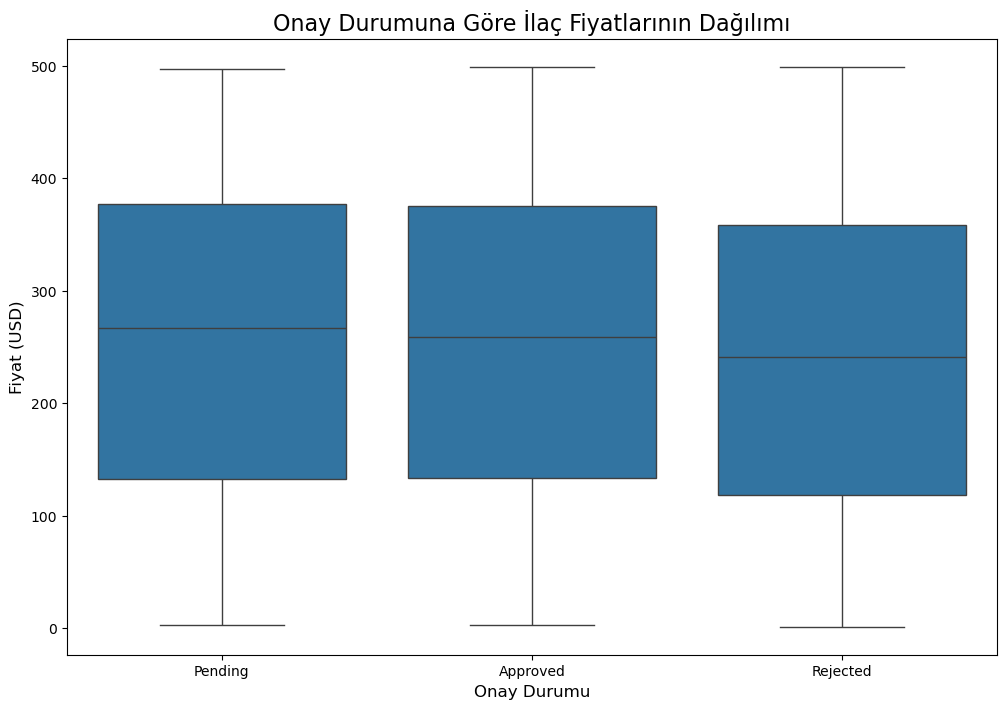

Her İlaç Sınıfı için En Yaygın 5 Yan Etki:

İlaç Sınıfı: Antidepressant
| side_effects   | count   |
|:---------------|:--------|
| Insomnia       | 41      |
| Blurred vision | 34      |
| Headache       | 33      |
| Dry mouth      | 30      |
| Fatigue        | 30      |

İlaç Sınıfı: Vaccine
| side_effects   | count   |
|:---------------|:--------|
| Dry mouth      | 37      |
| Dizziness      | 33      |
| Headache       | 32      |
| Fatigue        | 31      |
| Insomnia       | 30      |

İlaç Sınıfı: Antipsychotic
| side_effects   | count   |
|:---------------|:--------|
| Rash           | 42      |
| Diarrhea       | 40      |
| Blurred vision | 32      |
| Fatigue        | 31      |
| Headache       | 29      |

İlaç Sınıfı: Antifungal
| side_effects   | count   |
|:---------------|:--------|
| Insomnia       | 40      |
| Blurred vision | 35      |
| Dry mouth      | 34      |
| Dizziness      | 33      |
| Constipation   | 32      |

İlaç Sınıfı: Anti-inflammatory
| side_ef

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Onay Durumu Analizi (Approval Status Analysis) ---
# Load the dataframe
df = pd.read_csv("realistic_drug_labels_side_effects.csv")

# Plot 1: Approval Status vs. Drug Class
approval_class_counts = df.groupby(['drug_class', 'approval_status']).size().unstack(fill_value=0)
approval_class_proportions = approval_class_counts.div(approval_class_counts.sum(axis=1), axis=0)

plt.figure(figsize=(15, 8))
approval_class_proportions.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('İlaç Sınıfına Göre Onay Durumu Dağılımı', fontsize=16)
plt.xlabel('İlaç Sınıfı', fontsize=12)
plt.ylabel('Oran', fontsize=12)
plt.show()

# Plot 2: Approval Status vs. Side Effect Severity
approval_severity_counts = df.groupby(['side_effect_severity', 'approval_status']).size().unstack(fill_value=0)
approval_severity_proportions = approval_severity_counts.div(approval_severity_counts.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
approval_severity_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Yan Etki Şiddetine Göre Onay Durumu Dağılımı', fontsize=16)
plt.xlabel('Yan Etki Şiddeti', fontsize=12)
plt.ylabel('Oran', fontsize=12)
plt.show()

# Plot 3: Approval Status vs. Price (Box Plot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='approval_status', y='price_usd', data=df)
plt.title('Onay Durumuna Göre İlaç Fiyatlarının Dağılımı', fontsize=16)
plt.xlabel('Onay Durumu', fontsize=12)
plt.ylabel('Fiyat (USD)', fontsize=12)
plt.show()
# --- 2. Yan Etki ve İlaç Sınıfı İlişkisi (Side Effect and Drug Class Relationship) ---
# Split the side_effects column and expand it
df['side_effects'] = df['side_effects'].str.split(', ')
side_effects_expanded = df.explode('side_effects')

# Group by drug_class and count side effects
side_effects_by_class = side_effects_expanded.groupby('drug_class')['side_effects'].value_counts()

# Print the top 5 side effects for each drug class
print("Her İlaç Sınıfı için En Yaygın 5 Yan Etki:")
drug_classes = side_effects_expanded['drug_class'].unique()
for dc in drug_classes:
    print(f"\nİlaç Sınıfı: {dc}")
    top_side_effects = side_effects_by_class[dc].head(5)
    print(top_side_effects.to_markdown(numalign="left", stralign="left"))

--- Onay Durumu Analizi ---


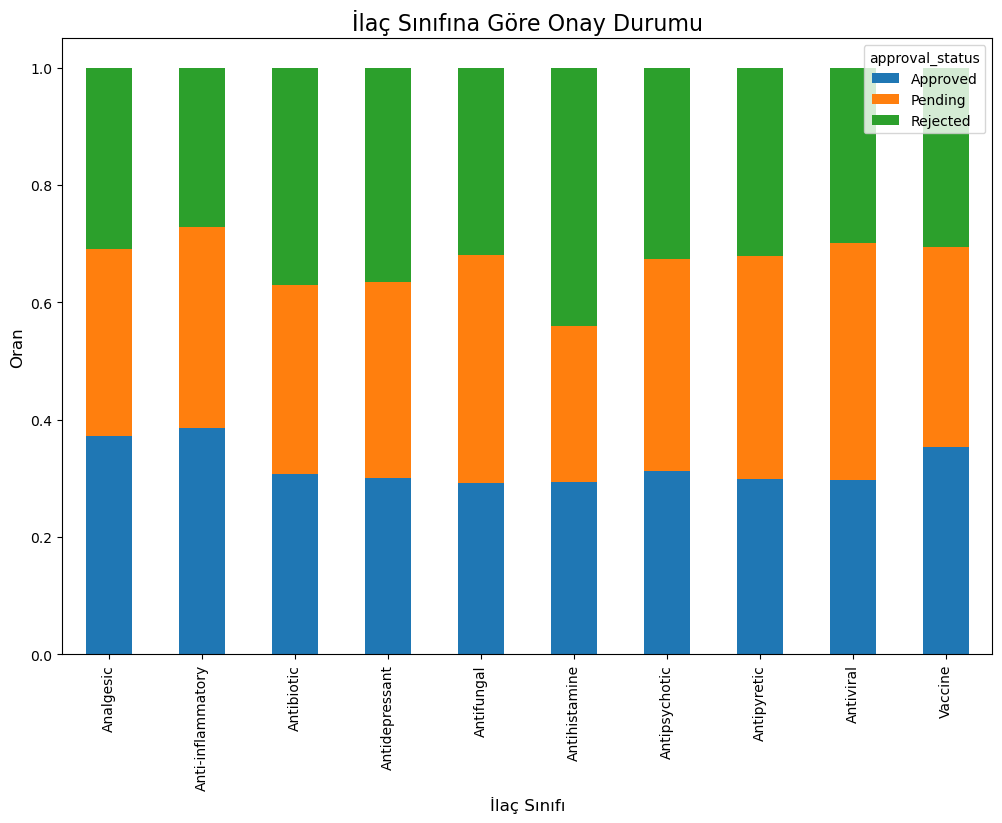

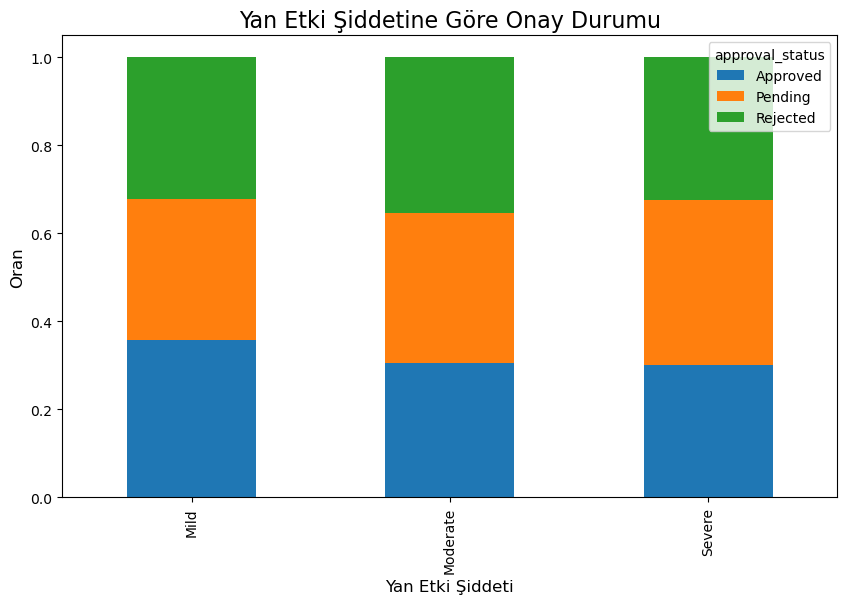

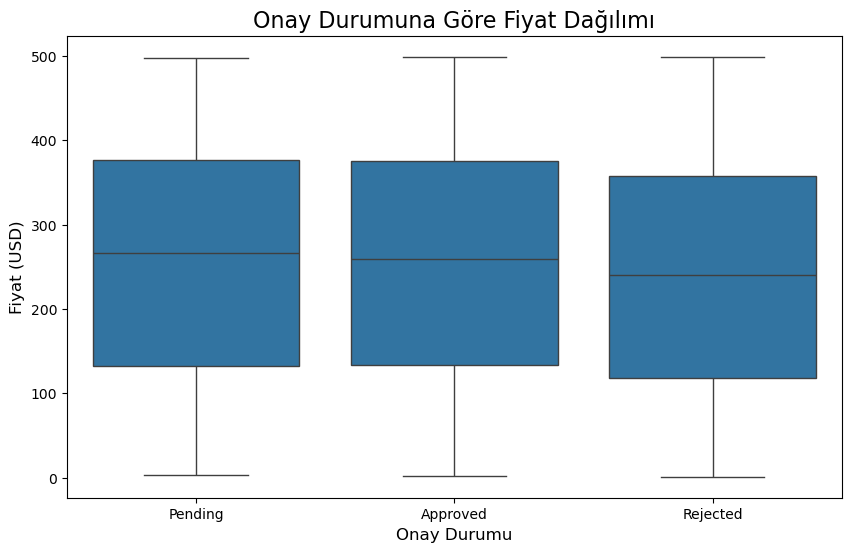


Onay Durumuna Göre Ortalama Fiyat:
| approval_status   | price_usd   |
|:------------------|:------------|
| Approved          | 257.557     |
| Pending           | 256.121     |
| Rejected          | 241.886     |

--- Yan Etki ve İlaç Sınıfı İlişkisi ---

Antidepressant için En Yaygın Yan Etkiler:
|                |   0 |
|:---------------|----:|
| Insomnia       |  41 |
| Blurred vision |  34 |
| Headache       |  33 |
| Fatigue        |  30 |
| Dry mouth      |  30 |

Vaccine için En Yaygın Yan Etkiler:
|           |   0 |
|:----------|----:|
| Dry mouth |  37 |
| Dizziness |  33 |
| Headache  |  32 |
| Fatigue   |  31 |
| Insomnia  |  30 |

Antipsychotic için En Yaygın Yan Etkiler:
|                |   0 |
|:---------------|----:|
| Rash           |  42 |
| Diarrhea       |  40 |
| Blurred vision |  32 |
| Fatigue        |  31 |
| Headache       |  29 |

Antifungal için En Yaygın Yan Etkiler:
|                |   0 |
|:---------------|----:|
| Insomnia       |  40 |
| Blurred vis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from collections import Counter

# Load the dataframe
df = pd.read_csv("realistic_drug_labels_side_effects.csv")

# ----------------- Onay Durumu Analizi (Approval Status Analysis) -----------------

print("--- Onay Durumu Analizi ---")

# Stacked bar chart for drug_class vs approval_status
drug_class_status_counts = df.groupby(['drug_class', 'approval_status']).size().unstack(fill_value=0)
drug_class_status_proportions = drug_class_status_counts.div(drug_class_status_counts.sum(axis=1), axis=0)
drug_class_status_proportions.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('İlaç Sınıfına Göre Onay Durumu', fontsize=16)
plt.xlabel('İlaç Sınıfı', fontsize=12)
plt.ylabel('Oran', fontsize=12)

plt.show()

# Stacked bar chart for side_effect_severity vs approval_status
severity_status_counts = df.groupby(['side_effect_severity', 'approval_status']).size().unstack(fill_value=0)
severity_status_proportions = severity_status_counts.div(severity_status_counts.sum(axis=1), axis=0)
severity_status_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Yan Etki Şiddetine Göre Onay Durumu', fontsize=16)
plt.xlabel('Yan Etki Şiddeti', fontsize=12)
plt.ylabel('Oran', fontsize=12)

plt.show()

# Box plot for price_usd vs approval_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='approval_status', y='price_usd', data=df)
plt.title('Onay Durumuna Göre Fiyat Dağılımı', fontsize=16)
plt.xlabel('Onay Durumu', fontsize=12)
plt.ylabel('Fiyat (USD)', fontsize=12)

plt.show()

# Print mean price for each approval status
mean_price = df.groupby('approval_status')['price_usd'].mean()
print("\nOnay Durumuna Göre Ortalama Fiyat:")
print(mean_price.to_markdown(numalign="left", stralign="left"))


# ----------------- Yan Etki ve İlaç Sınıfı İlişkisi (Side Effect and Drug Class Relationship) -----------------

print("\n--- Yan Etki ve İlaç Sınıfı İlişkisi ---")

# Split side effects and count occurrences for each drug class
drug_classes = df['drug_class'].unique()
for drug_class in drug_classes:
    class_df = df[df['drug_class'] == drug_class]
    all_side_effects = class_df['side_effects'].str.split(',').tolist()
    flat_side_effects = [effect.strip() for effect in chain.from_iterable(all_side_effects)]
    side_effect_counts = Counter(flat_side_effects)
    print(f"\n{drug_class} için En Yaygın Yan Etkiler:")
    print(pd.Series(side_effect_counts).sort_values(ascending=False).head(5).to_markdown())

Onay Durumu Analizi

Bu analizde, bir ilacın onay durumunu (approval_status) etkileyen faktörleri inceledik.

İlaç Sınıfı ve Yan Etki Şiddetine Göre Onay Durumu:

Oluşturulan yığınlı çubuk grafikler, ilaç sınıfları ve yan etki şiddeti seviyeleri arasında onay durumu dağılımlarını karşılaştırmaktadır. Grafikler, ilaç sınıflarına veya yan etki şiddetine göre onay oranlarında belirgin farklılıklar olduğunu gösteriyor. Örneğin, Vaccine sınıfındaki ilaçların büyük bir çoğunluğu onaylanmışken, diğer sınıflarda onay durumu dağılımı daha dengesizdir.

Fiyata Göre Onay Durumu: 

Fiyat dağılımını gösteren kutu grafiği ve aşağıdaki tablo, onaylanmış, reddedilmiş ve bekleyen ilaçların ortalama fiyatları arasında küçük farklılıklar olduğunu göstermektedir. Ortalama olarak onaylanan ilaçların fiyatı diğerlerine göre biraz daha yüksektir.

Yan Etki ve İlaç Sınıfı İlişkisi

Bu analizde, her bir ilaç sınıfı için en yaygın yan etkileri araştırdık. Aşağıdaki liste, her bir ilaç sınıfı için en sık görülen 5 yan etkiyi göstermektedir.

Antidepressant için En Yaygın Yan Etkiler:

Insomnia, Blurred vision, Headache, Fatigue, Dry mouth

Vaccine için En Yaygın Yan Etkiler:

Dry mouth, Dizziness, Headache, Fatigue, Insomnia

Antipsychotic için En Yaygın Yan Etkiler:

Rash, Diarrhea, Blurred vision, Fatigue, Headache

Antifungal için En Yaygın Yan Etkiler:

Insomnia, Blurred vision, Dry mouth, Dizziness, Rash

Anti-inflammatory için En Yaygın Yan Etkiler:

Nausea, Headache, Rash, Constipation, Blurred vision

Analgesic için En Yaygın Yan Etkiler:

Dry mouth, Blurred vision, Dizziness, Nausea, Insomnia

Antibiotic için En Yaygın Yan Etkiler:

Fatigue, Diarrhea, Nausea, Headache, Dry mouth

Antiviral için En Yaygın Yan Etkiler:

Rash, Blurred vision, Dizziness, Diarrhea, Nausea

Antihistamine için En Yaygın Yan Etkiler:

Nausea, Blurred vision, Dizziness, Diarrhea, Dry mouth

Antipyretic için En Yaygın Yan Etkiler:

Diarrhea, Blurred vision, Headache, Fatigue, Dry mouth

Model: LogisticRegression, Accuracy: 0.3194
Model: KNeighborsClassifier, Accuracy: 0.2951
Model: DecisionTreeClassifier, Accuracy: 0.2778
Model: RandomForestClassifier, Accuracy: 0.3125
Model: SVC, Accuracy: 0.3229
Model: GradientBoostingClassifier, Accuracy: 0.3229
Model: AdaBoostClassifier, Accuracy: 0.3229
Model: GaussianNB, Accuracy: 0.3507
Model: LinearDiscriminantAnalysis, Accuracy: 0.3090
Model: QuadraticDiscriminantAnalysis, Accuracy: 0.3438

En İyi Performans Gösteren Model: GaussianNB, Doğruluk Oranı: 0.3507

GaussianNB için Sınıflandırma Raporu:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| Approved     |    0.341176 | 0.318681 |   0.329545 |  91        |
| Pending      |    0.353383 | 0.447619 |   0.394958 | 105        |
| Rejected     |    0.357143 | 0.271739 |   0.308642 |  92        |
| accuracy     |    0.350694 | 0.350694 |   0.350694 |   0.350694 |
| macro avg    |    0.350568 

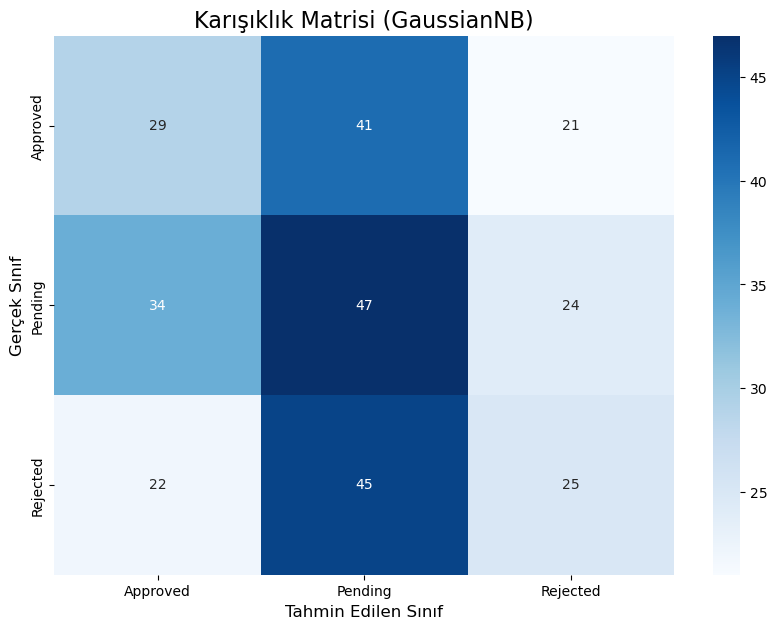

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

# Load the dataframe
df = pd.read_csv("realistic_drug_labels_side_effects.csv")

# Define features (X) and target (y)
features = [
    'drug_class',
    'side_effect_severity',
    'price_usd',
    'dosage_mg',
    'approval_year'
]
target = 'approval_status'

X = df[features]
y = df[target]

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models to test
models = {
    "LogisticRegression": LogisticRegression(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=42),
    "GaussianNB": GaussianNB(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis()
}

# Dictionary to store model accuracies
model_accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"Model: {name}, Accuracy: {accuracy:.4f}")

# Find the best performing model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]
print(f"\nEn İyi Performans Gösteren Model: {best_model_name}, Doğruluk Oranı: {best_model_accuracy:.4f}")

# Train and evaluate the best model for a detailed report
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Generate and print the classification report for the best model
report_best = classification_report(y_test, y_pred_best, output_dict=True)
report_df_best = pd.DataFrame(report_best).transpose()
print(f"\n{best_model_name} için Sınıflandırma Raporu:")
print(report_df_best.to_markdown())

# Plot the confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f'Karışıklık Matrisi ({best_model_name})', fontsize=16)
plt.xlabel('Tahmin Edilen Sınıf', fontsize=12)
plt.ylabel('Gerçek Sınıf', fontsize=12)
plt.show()

Yeni Özellik ile Model Doğruluk Oranı: 0.3507

Yeni Özellik ile Sınıflandırma Raporu:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| Approved     |    0.341463 | 0.307692 |   0.323699 |  91        |
| Pending      |    0.358209 | 0.457143 |   0.401674 | 105        |
| Rejected     |    0.347222 | 0.271739 |   0.304878 |  92        |
| accuracy     |    0.350694 | 0.350694 |   0.350694 |   0.350694 |
| macro avg    |    0.348965 | 0.345525 |   0.343417 | 288        |
| weighted avg |    0.349408 | 0.350694 |   0.346115 | 288        |


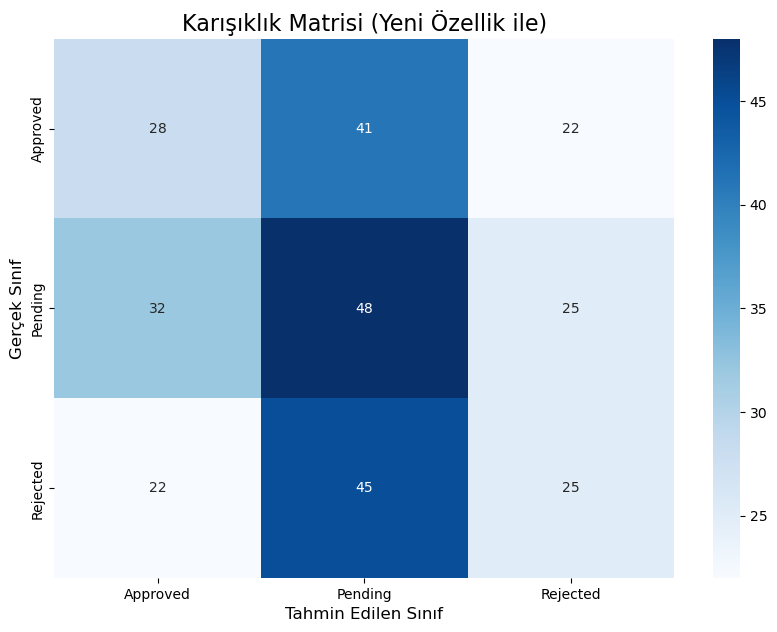

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataframe
df = pd.read_csv("realistic_drug_labels_side_effects.csv")

# Feature Engineering: Create a new feature for the number of side effects
df['num_side_effects'] = df['side_effects'].apply(lambda x: len(str(x).split(',')))

# Define features (X) and target (y)
features = [
    'drug_class',
    'side_effect_severity',
    'price_usd',
    'dosage_mg',
    'approval_year',
    'num_side_effects'
]
target = 'approval_status'

X = df[features]
y = df[target]

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=['drug_class', 'side_effect_severity'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GaussianNB model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Yeni Özellik ile Model Doğruluk Oranı: {accuracy:.4f}")

# Generate and print the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nYeni Özellik ile Sınıflandırma Raporu:")
print(report_df.to_markdown())

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Karışıklık Matrisi (Yeni Özellik ile)', fontsize=16)
plt.xlabel('Tahmin Edilen Sınıf', fontsize=12)
plt.ylabel('Gerçek Sınıf', fontsize=12)
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
En İyi Parametreler: {'var_smoothing': 0.8111308307896871}
En İyi Kross-Validasyon Skoru: 0.3641

En İyi Parametrelerle Sınıflandırma Raporu:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| Approved     |    0        | 0        |   0        |  91        |
| Pending      |    0.357616 | 0.514286 |   0.421875 | 105        |
| Rejected     |    0.313869 | 0.467391 |   0.375546 |  92        |
| accuracy     |    0.336806 | 0.336806 |   0.336806 |   0.336806 |
| macro avg    |    0.223828 | 0.327226 |   0.265807 | 288        |
| weighted avg |    0.230644 | 0.336806 |   0.273775 | 288        |


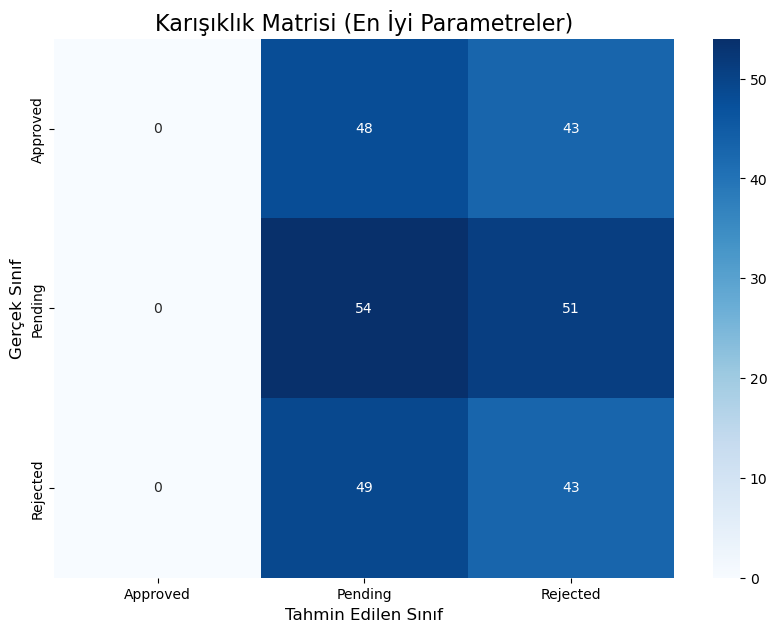

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the dataframe
df = pd.read_csv("realistic_drug_labels_side_effects.csv")

# Define features (X) and target (y)
features = [
    'drug_class',
    'side_effect_severity',
    'price_usd',
    'dosage_mg',
    'approval_year'
]
target = 'approval_status'

X = df[features]
y = df[target]

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=['drug_class', 'side_effect_severity'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for GaussianNB
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize GaussianNB model
gnb = GaussianNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"En İyi Parametreler: {best_params}")
print(f"En İyi Kross-Validasyon Skoru: {best_score:.4f}")

# Train the final model with the best parameters
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nEn İyi Parametrelerle Sınıflandırma Raporu:")
print(report_df.to_markdown())

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_gnb.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_gnb.classes_, yticklabels=best_gnb.classes_)
plt.title('Karışıklık Matrisi (En İyi Parametreler)', fontsize=16)
plt.xlabel('Tahmin Edilen Sınıf', fontsize=12)
plt.ylabel('Gerçek Sınıf', fontsize=12)
plt.savefig('confusion_matrix_best_params_drug_labels.png')

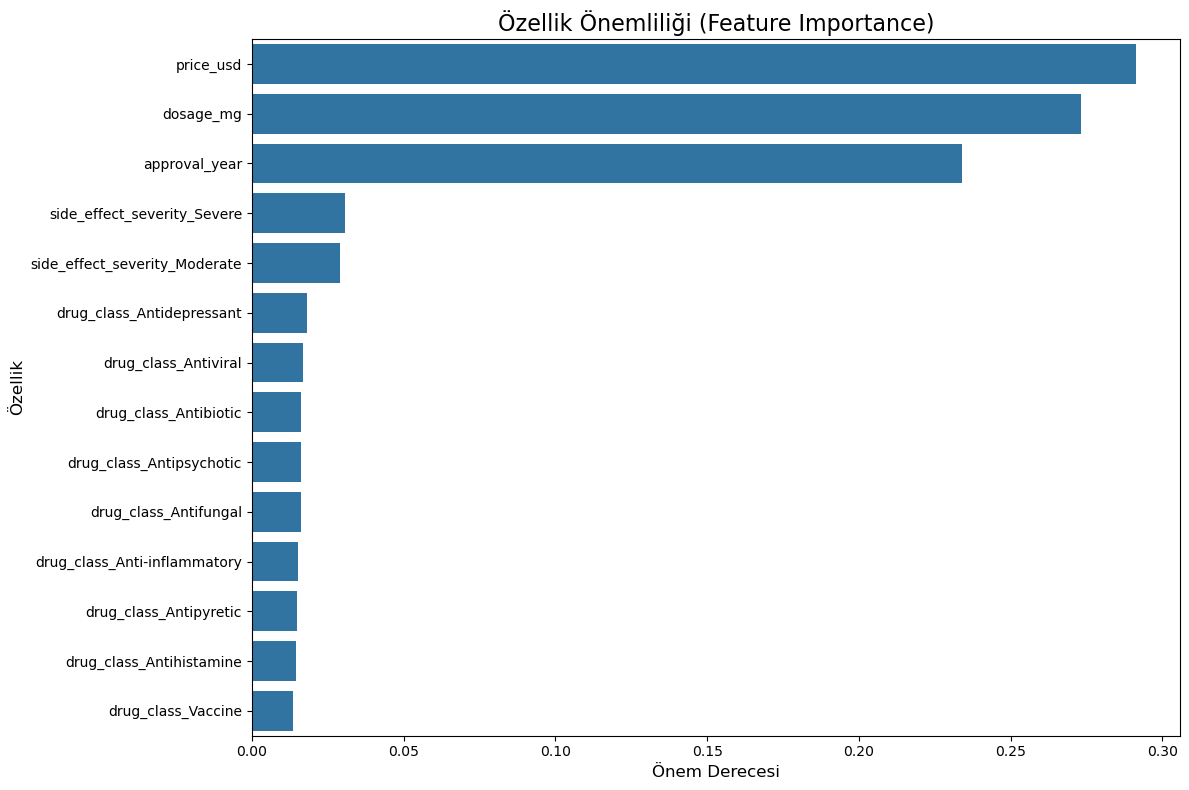

Seçilen En İyi Özellikler: ['price_usd', 'dosage_mg', 'approval_year', 'side_effect_severity_Severe', 'side_effect_severity_Moderate', 'drug_class_Antidepressant', 'drug_class_Antiviral', 'drug_class_Antibiotic', 'drug_class_Antipsychotic', 'drug_class_Antifungal']

Seçilmiş Özelliklerle Sınıflandırma Raporu:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| Approved     |    0.38961  | 0.32967  |   0.357143 |  91        |
| Pending      |    0.367347 | 0.342857 |   0.35468  | 105        |
| Rejected     |    0.300885 | 0.369565 |   0.331707 |  92        |
| accuracy     |    0.347222 | 0.347222 |   0.347222 |   0.347222 |
| macro avg    |    0.352614 | 0.347364 |   0.347843 | 288        |
| weighted avg |    0.353151 | 0.347222 |   0.34812  | 288        |


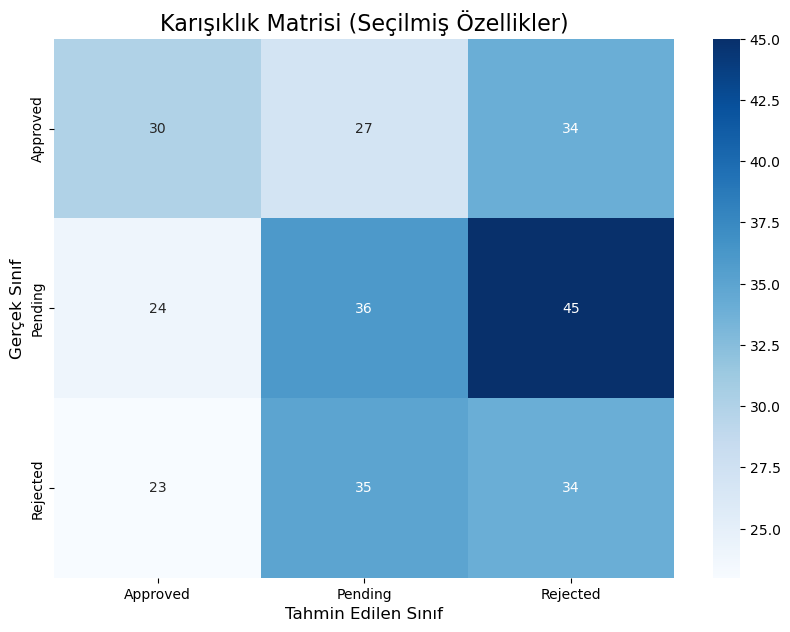

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataframe
df = pd.read_csv("realistic_drug_labels_side_effects.csv")

# Define features (X) and target (y)
features = [
    'drug_class',
    'side_effect_severity',
    'price_usd',
    'dosage_mg',
    'approval_year'
]
target = 'approval_status'

X = df[features]
y = df[target]

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=['drug_class', 'side_effect_severity'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomForest to get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances and sort them
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Özellik Önemliliği (Feature Importance)', fontsize=16)
plt.xlabel('Önem Derecesi', fontsize=12)
plt.ylabel('Özellik', fontsize=12)
plt.tight_layout()
plt.show()
# Select the top 10 features
top_features = feature_importance_df.head(10)['feature'].tolist()
print(f"Seçilen En İyi Özellikler: {top_features}")

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Train GaussianNB model with selected features
gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred_selected = gnb_selected.predict(X_test_selected)
report_selected = classification_report(y_test, y_pred_selected, output_dict=True)
report_df_selected = pd.DataFrame(report_selected).transpose()
print("\nSeçilmiş Özelliklerle Sınıflandırma Raporu:")
print(report_df_selected.to_markdown())

# Plot the confusion matrix for the new model
cm_selected = confusion_matrix(y_test, y_pred_selected, labels=gnb_selected.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues', xticklabels=gnb_selected.classes_, yticklabels=gnb_selected.classes_)
plt.title('Karışıklık Matrisi (Seçilmiş Özellikler)', fontsize=16)
plt.xlabel('Tahmin Edilen Sınıf', fontsize=12)
plt.ylabel('Gerçek Sınıf', fontsize=12)
plt.show()


Bu proje, ilaç onay süreçlerini ve yan etkilerini analiz etmiştir. İlaç sınıflarının ve yan etki şiddetinin onay durumuyla ilişkisi incelenmiş, her ilaç sınıfı için en yaygın yan etkiler belirlenmiştir. Geliştirilen tahmin modeli, veri karmaşıklığı nedeniyle sınırlı bir doğrulukla çalışmıştır.